# [!] Notebook Description

Sinubi's Journey - ML - Regression

Oleh : Sinubi

September 2023 (230904)

# [A] Problem Definition and Scoping

Di sini kita akan memprediksi nilai siswa berdasarkan waktu belajar siswa, jenis kelamin, dan akses internet yang dimiliki siswa

# [B] Data Gathering and Preparation

In [ ]:
# Import Packages/Libraries yang diperlukan
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
# Download Dataset
gdown.download_folder("https://drive.google.com/drive/folders/1d0O3AuXl4z8VSj75v6WWuaxtUWXnmSYB?usp=sharing")

Retrieving folder list


Processing file 1Z1oDLjOAedliOGfI_zRiV9UgqXUC605G Dataset SJ 01.xlsx
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1Z1oDLjOAedliOGfI_zRiV9UgqXUC605G
To: /content/Sinubi's Journey/Dataset SJ 01.xlsx
100%|██████████| 12.2k/12.2k [00:00<00:00, 27.6MB/s]
Download completed


["/content/Sinubi's Journey/Dataset SJ 01.xlsx"]

In [ ]:
# Import Dataset
nama_file = "./Sinubi's Journey/Dataset SJ 01.xlsx"

data = pd.read_excel(nama_file, sheet_name='data')

# [C] Exploratory Data Analysis (EDA)

## [C1] Basic Information

In [ ]:
# Melihat Data pada Dataset yang dimuat (5 Data Pertama)
data.head()

,Nomor Induk,Nama,Jenis Kelamin,Mata Pelajaran,Akses Internet,Waktu Belajar,Nilai,Lulus
0,DS23001,Sinubi,Pria,Pemrograman Python,Ada,8.0,85,Lulus
1,DS23002,Budi,Pria,Pemrograman Python,Ada,7.5,80,Lulus
2,DS23003,Ayu,Wanita,Pemrograman Python,Ada,8.5,90,Lulus
3,DS23004,Tono,Pria,Machine Learning,Ada,8.2,88,Lulus
4,DS23005,Putri,Wanita,Machine Learning,Ada,7.7,83,Lulus


In [ ]:
# Melihat Jumlah Kolom/Variabel serta Jumlah Baris Data atau Data Points
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nomor Induk     60 non-null     object 
 1   Nama            60 non-null     object 
 2   Jenis Kelamin   60 non-null     object 
 3   Mata Pelajaran  60 non-null     object 
 4   Akses Internet  60 non-null     object 
 5   Waktu Belajar   60 non-null     float64
 6   Nilai           60 non-null     int64  
 7   Lulus           60 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.9+ KB


## [C2] Data Type Correction

In [ ]:
# Kita ubah tipe data variabel fitur pada Dataset kita agar menjadi variabel numerik
# catatan : tidak perlu karena sudah numerik semua

daftar_nama_kolom_numerik = ['Waktu Belajar', 'Nilai']

for nama_kolom in daftar_nama_kolom_numerik:
  data[nama_kolom] = pd.to_numeric(data[nama_kolom])

In [ ]:
# Kita ubah tipe data viarabel taget pada Dataset kita agar menjadi variabel kategorik

daftar_nama_kolom_kategorik = ['Jenis Kelamin', 'Mata Pelajaran','Akses Internet','Lulus']

for nama_kolom in daftar_nama_kolom_kategorik:
  data[nama_kolom] = data[nama_kolom].astype('category')

In [ ]:
# Kita periksa kembali informasi mengenai Dataset kita
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Nomor Induk     60 non-null     object  
 1   Nama            60 non-null     object  
 2   Jenis Kelamin   60 non-null     category
 3   Mata Pelajaran  60 non-null     category
 4   Akses Internet  60 non-null     category
 5   Waktu Belajar   60 non-null     float64 
 6   Nilai           60 non-null     int64   
 7   Lulus           60 non-null     category
dtypes: category(4), float64(1), int64(1), object(2)
memory usage: 2.7+ KB


## [C3] Missing Values

In [ ]:
# Kita akan periksa apakah Dataset memiliki nilai kosong atau missing values
data.isnull().sum()

Nomor Induk       0
Nama              0
Jenis Kelamin     0
Mata Pelajaran    0
Akses Internet    0
Waktu Belajar     0
Nilai             0
Lulus             0
dtype: int64

## [C4] Univariate Analysis

### [C4.A] Descriptive Statistics

In [ ]:
# Statistik Deskriptif untuk setiap Variabel Numerik
data.describe()

,Waktu Belajar,Nilai
count,60.000000,60.000000
mean,5.998333,63.966667
std,2.154655,19.961800
min,1.900000,23.000000
25%,3.875000,45.750000
50%,6.750000,66.500000
75%,7.750000,81.250000
max,9.400000,92.000000


### [C4.B] Histogram

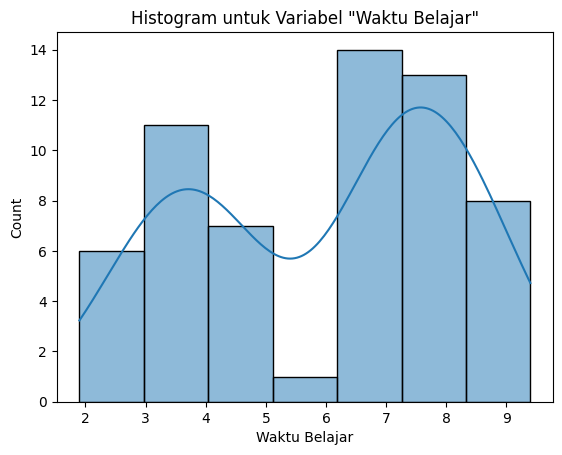

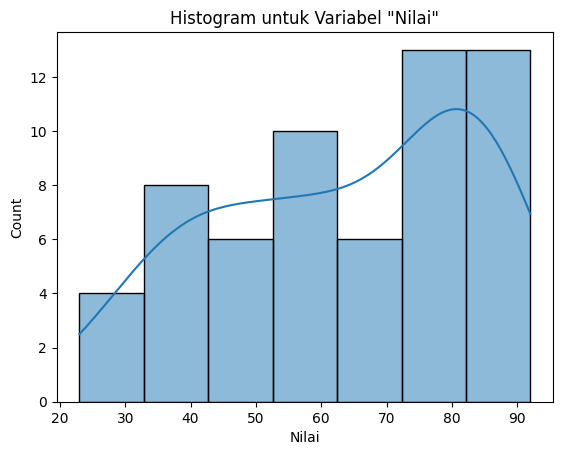

In [ ]:
# Visualisasi Histogram untuk setiap Variabel Numerik

for nama_kolom in daftar_nama_kolom_numerik:
  judul = 'Histogram untuk Variabel "' + nama_kolom + '"'

  plot = sns.histplot(data = data, x = nama_kolom, kde=True)
  plot_title = plt.title(judul)

  plt.show()
  print()

### [C4.C] Bar Chart

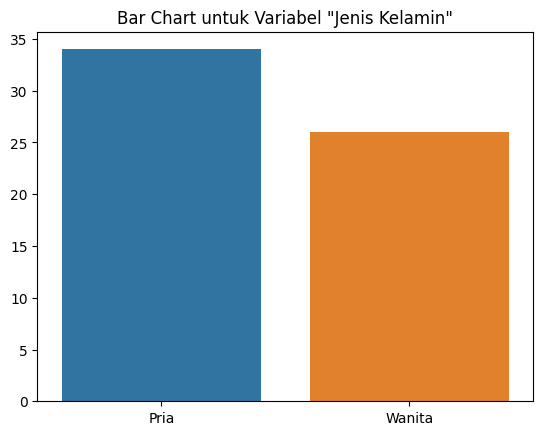

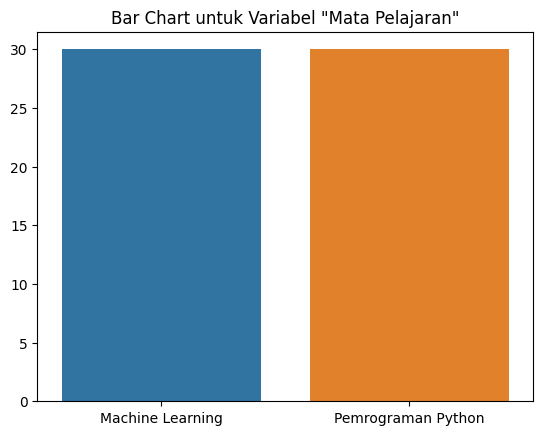

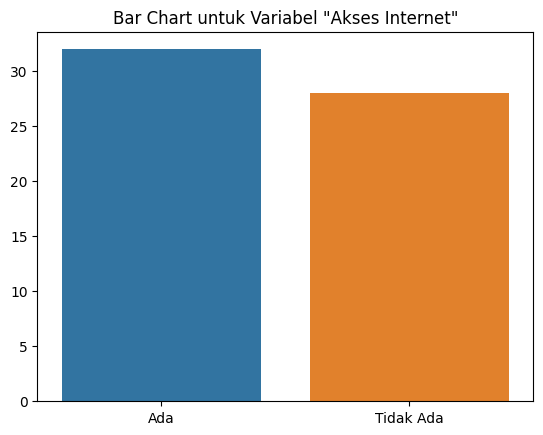

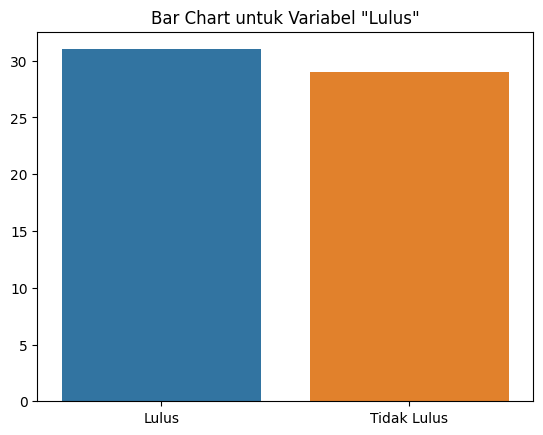

In [ ]:
# Visualisasi Distribusi Frequency dari Level untuk Variabel Kategorik pada Dataset
# menggunakan Bar Chart

palet_warna = sns.color_palette('bright')

for nama_kolom in daftar_nama_kolom_kategorik :
  judul = 'Bar Chart untuk Variabel "' + nama_kolom + '"'

  data_plot  = data[nama_kolom].value_counts().to_list()
  label_plot = data[nama_kolom].value_counts().index.to_list()

  plot       = sns.barplot(x = label_plot, y = data_plot)
  plot_title = plt.title(judul)

  plt.show()
  print()

## [C5] Bivariate Analysis

### [C.5.A] Scatterplot Matrix


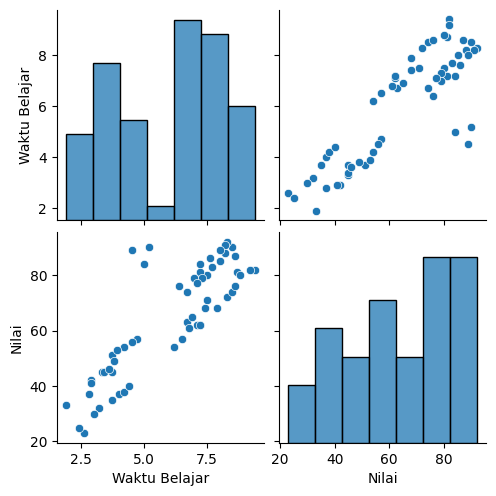

In [ ]:
# Scatter Plot antara Variabel Numerik

sns.pairplot(data);

## [C6] Statistical Test

### [C6.A] Pearson Correlation

In [ ]:
# Korelasi Pearson antara Waktu Belajar dengan Nilai
corr_pearson, _ = pearsonr(data['Waktu Belajar'], data['Nilai'])
print('Pearsons Correlation : %.3f' % corr_pearson)

Pearsons Correlation : 0.846


# [D] Data Wrangling and Variable Transformation

## [D1] Label Encoding for Categorical Variables

In [ ]:
data_proc1 = data.copy()

In [ ]:
data_proc1.head()

,Nomor Induk,Nama,Jenis Kelamin,Mata Pelajaran,Akses Internet,Waktu Belajar,Nilai,Lulus
0,DS23001,Sinubi,Pria,Pemrograman Python,Ada,8.0,85,Lulus
1,DS23002,Budi,Pria,Pemrograman Python,Ada,7.5,80,Lulus
2,DS23003,Ayu,Wanita,Pemrograman Python,Ada,8.5,90,Lulus
3,DS23004,Tono,Pria,Machine Learning,Ada,8.2,88,Lulus
4,DS23005,Putri,Wanita,Machine Learning,Ada,7.7,83,Lulus


In [ ]:
data_proc1['Jenis Kelamin'] = [0 if x == 'Pria' else 1 for x in data_proc1['Jenis Kelamin']]

In [ ]:
data_proc1.head()

,Nomor Induk,Nama,Jenis Kelamin,Mata Pelajaran,Akses Internet,Waktu Belajar,Nilai,Lulus
0,DS23001,Sinubi,0,Pemrograman Python,Ada,8.0,85,Lulus
1,DS23002,Budi,0,Pemrograman Python,Ada,7.5,80,Lulus
2,DS23003,Ayu,1,Pemrograman Python,Ada,8.5,90,Lulus
3,DS23004,Tono,0,Machine Learning,Ada,8.2,88,Lulus
4,DS23005,Putri,1,Machine Learning,Ada,7.7,83,Lulus


In [ ]:
data_proc1['Akses Internet'] = [1 if x == 'Ada' else 0 for x in data_proc1['Akses Internet']]

In [ ]:
data_proc1.head()

,Nomor Induk,Nama,Jenis Kelamin,Mata Pelajaran,Akses Internet,Waktu Belajar,Nilai,Lulus
0,DS23001,Sinubi,0,Pemrograman Python,1,8.0,85,Lulus
1,DS23002,Budi,0,Pemrograman Python,1,7.5,80,Lulus
2,DS23003,Ayu,1,Pemrograman Python,1,8.5,90,Lulus
3,DS23004,Tono,0,Machine Learning,1,8.2,88,Lulus
4,DS23005,Putri,1,Machine Learning,1,7.7,83,Lulus


## [D2] Defining Features Variables and Target Variables

In [ ]:
# Mendefinisikan Variabel Fitur/Independent/Predictor/X

daftar_variabel_fitur = ['Jenis Kelamin', 'Akses Internet','Waktu Belajar']

X = data_proc1[daftar_variabel_fitur]
X[0:5]

,Jenis Kelamin,Akses Internet,Waktu Belajar
0,0,1,8.0
1,0,1,7.5
2,1,1,8.5
3,0,1,8.2
4,1,1,7.7


In [ ]:
# Mendefinisikan Variabel Target/Dependent/Y

Y = data_proc1['Nilai']
Y[0:5]

0    85
1    80
2    90
3    88
4    83
Name: Nilai, dtype: int64

## [D3] Partitioning Dataset into Train and Test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 123)

In [ ]:
# Melihat Ukuran Data Variabel Fitur untuk Data Latih (Train)
X_train.shape

(48, 3)

In [ ]:
# Melihat Ukuran Data Variabel Target untuk Data Latih (Train)
Y_train.shape

(48,)

In [ ]:
# Melihat Ukuran Data Variabel Fitur untuk Data Uji (Test)
X_test.shape

(12, 3)

In [ ]:
# Melihat Ukuran Data Variabel Target untuk Data Uji (Test)
Y_test.shape

(12,)

# [E] Modelling

## [E1] Create Model

In [ ]:
# Membuat Model Pertama (Linear Regression)

model_1 = LinearRegression(fit_intercept = True)

In [ ]:
# Membuat Model Kedua (Decision Tree Regressor)

model_2 = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 3)

In [ ]:
# Membuat Model Ketiga (KNN Regressor)

model_3 = KNeighborsRegressor(n_neighbors = 3, p = 2, metric = 'minkowski')

In [ ]:
# Membuat Model Keempat (Support Vector Regression)

model_4 = SVR(kernel='linear', C = 1.0)

## [E2] Train Model

In [ ]:
# Melatih Model Pertama
model_1.fit(X_train,Y_train)

LinearRegression()

In [ ]:
# Melatih Model Kedua
model_2.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
# Melatih Model Ketiga
model_3.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# Melatih Model Keempat
model_4.fit(X_train,Y_train)

SVR(kernel='linear')

## [E3] Model Interpretation

In [ ]:
# Koefisien dan Intercept Regresi Linier
print(model_1.coef_)
print(model_1.intercept_)

[ 2.86916434 12.69803028  8.0557019 ]
8.449665402675947


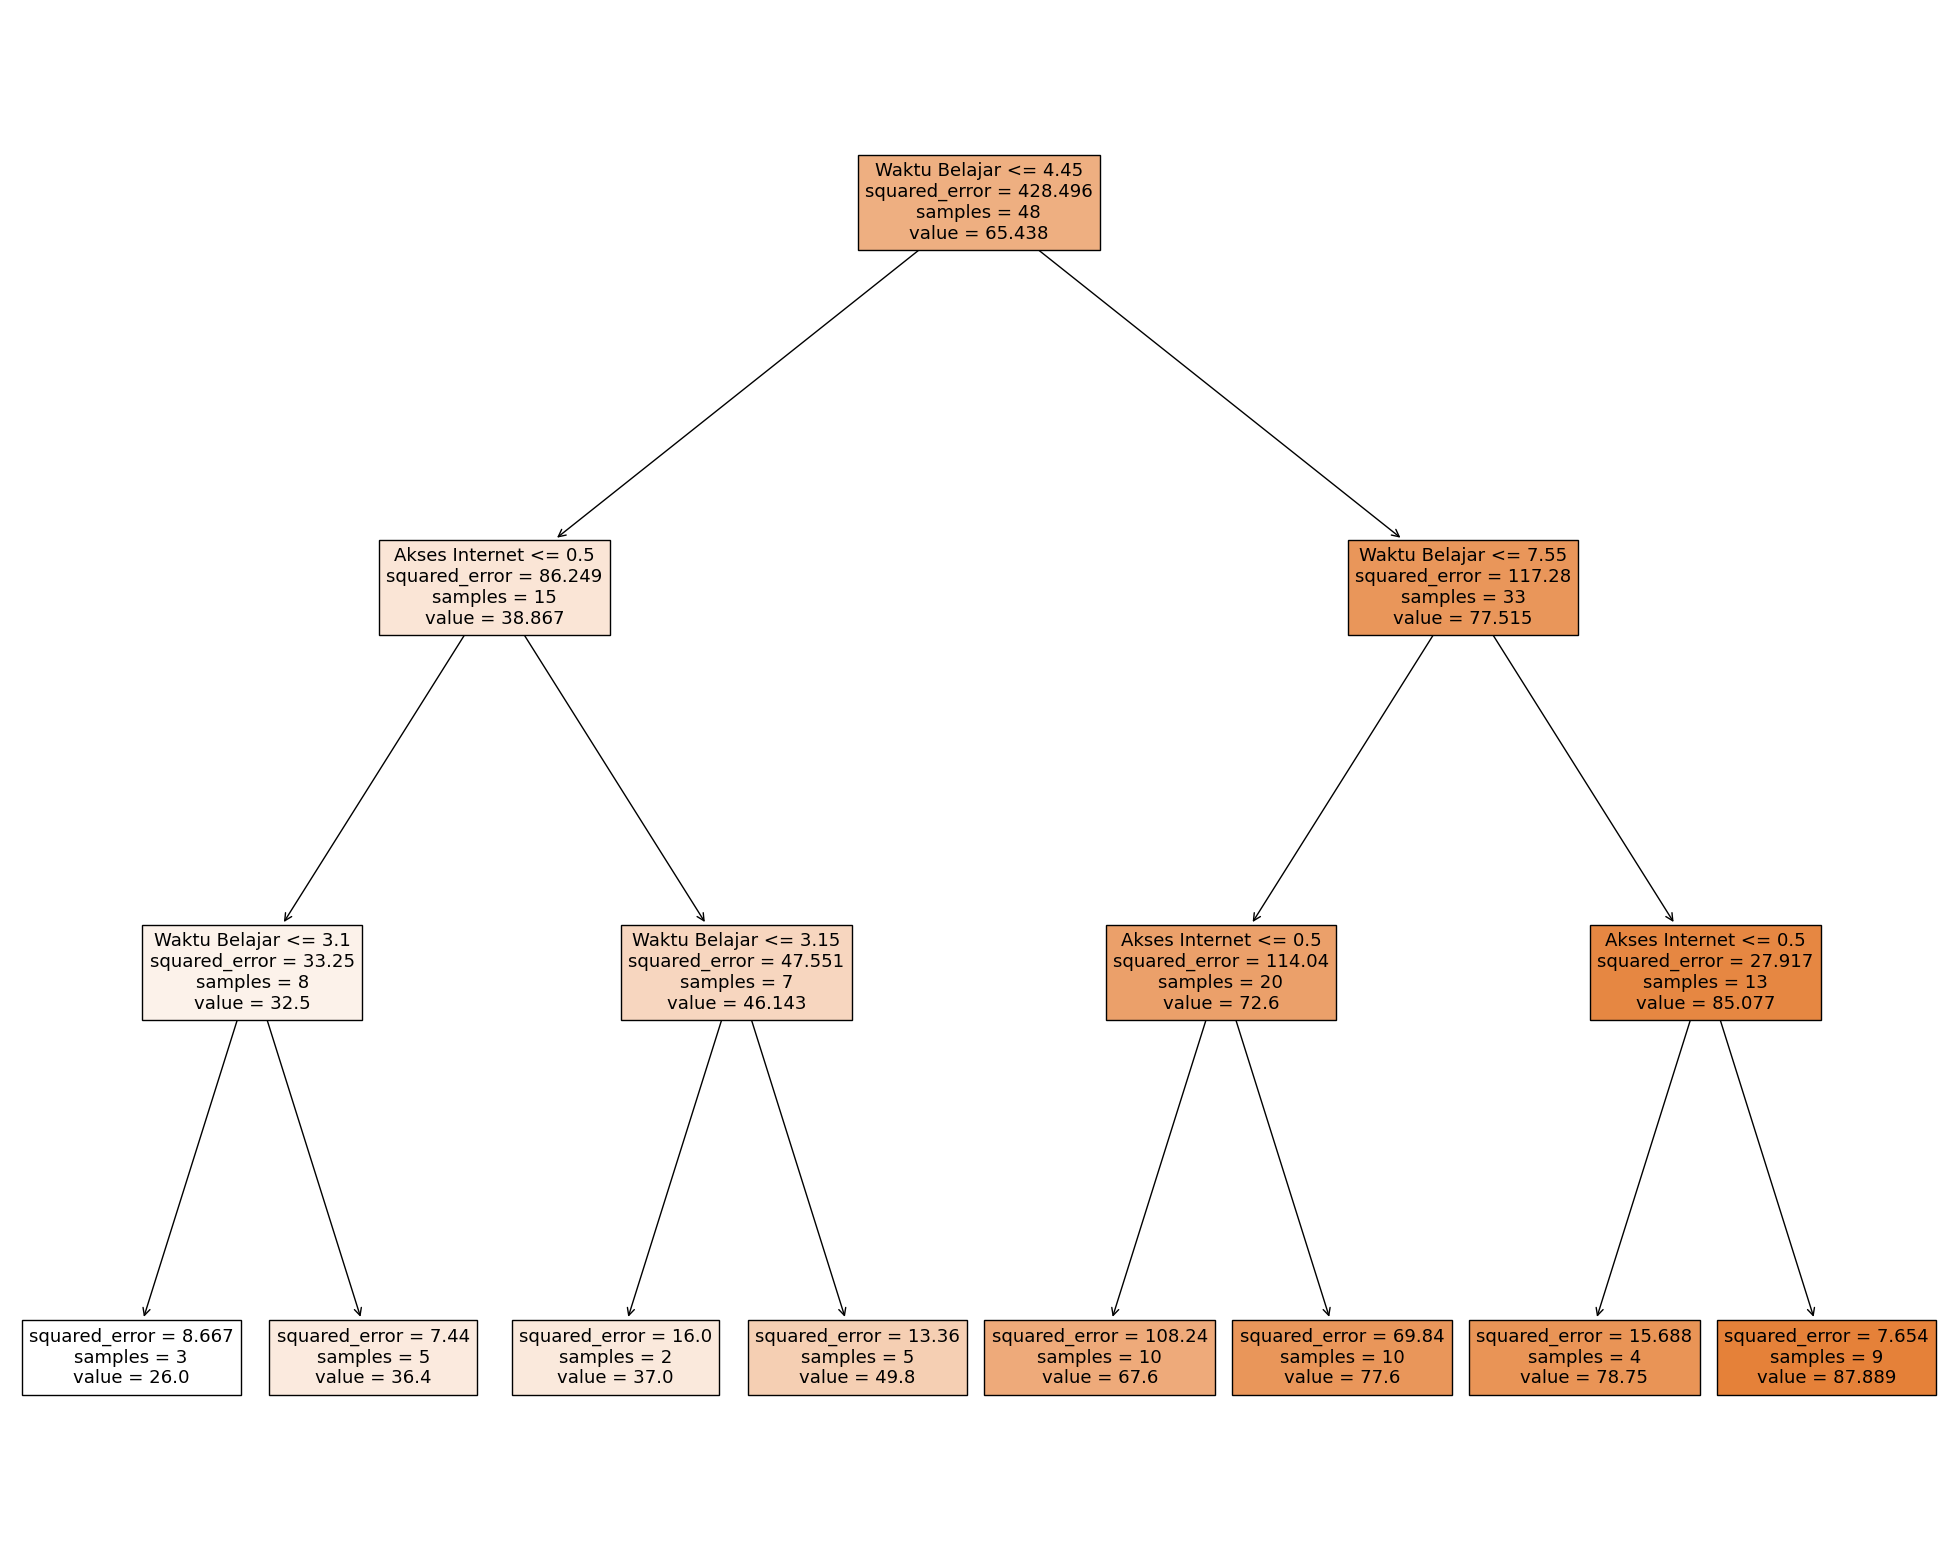

In [ ]:
# Visualisasi Decision Tree
fig = plt.figure(figsize=(25,20))
viz_model_1 = plot_tree(model_2,
                        feature_names = daftar_variabel_fitur,
                        filled = True)

# [F] Model Evaluation

## [F1] Prediction for Train Data

In [ ]:
# Prediksi untuk Model Pertama (Train Data)
pred_model_1_train = model_1.predict(X_train)

df_pred_model_1_train = pd.DataFrame(X_train, columns = daftar_variabel_fitur)
df_pred_model_1_train['Nilai'] = Y_train
df_pred_model_1_train['Prediksi Nilai'] = pred_model_1_train
df_pred_model_1_train.head()

,Jenis Kelamin,Akses Internet,Waktu Belajar,Nilai,Prediksi Nilai
54,0,0,8.8,80,79.339842
23,0,1,3.7,51,50.953793
11,0,0,7.2,62,66.450719
0,0,1,8.0,85,85.593311
5,0,1,7.6,86,82.371030


In [ ]:
# Prediksi untuk Model Kedua (Train Data)
pred_model_2_train = model_2.predict(X_train)

df_pred_model_2_train = pd.DataFrame(X_train, columns = daftar_variabel_fitur)
df_pred_model_2_train['Nilai'] = Y_train
df_pred_model_2_train['Prediksi Nilai'] = pred_model_2_train
df_pred_model_2_train.head()

,Jenis Kelamin,Akses Internet,Waktu Belajar,Nilai,Prediksi Nilai
54,0,0,8.8,80,78.750000
23,0,1,3.7,51,49.800000
11,0,0,7.2,62,67.600000
0,0,1,8.0,85,87.888889
5,0,1,7.6,86,87.888889


In [ ]:
# Prediksi untuk Model Ketiga (Train Data)
pred_model_3_train = model_3.predict(X_train)

df_pred_model_3_train = pd.DataFrame(X_train, columns = daftar_variabel_fitur)
df_pred_model_3_train['Nilai'] = Y_train
df_pred_model_3_train['Prediksi Nilai'] = pred_model_3_train
df_pred_model_3_train.head()

,Jenis Kelamin,Akses Internet,Waktu Belajar,Nilai,Prediksi Nilai
54,0,0,8.8,80,78.000000
23,0,1,3.7,51,50.333333
11,0,0,7.2,62,72.333333
0,0,1,8.0,85,88.333333
5,0,1,7.6,86,81.666667


In [ ]:
# Prediksi untuk Model Keempat (Train Data)
pred_model_4_train = model_4.predict(X_train)

df_pred_model_4_train = pd.DataFrame(X_train, columns = daftar_variabel_fitur)
df_pred_model_4_train['Nilai'] = Y_train
df_pred_model_4_train['Prediksi Nilai'] = pred_model_4_train
df_pred_model_4_train.head()

,Jenis Kelamin,Akses Internet,Waktu Belajar,Nilai,Prediksi Nilai
54,0,0,8.8,80,80.756488
23,0,1,3.7,51,47.628114
11,0,0,7.2,62,66.813475
0,0,1,8.0,85,85.099959
5,0,1,7.6,86,81.614206


## [F2] Prediction for Test Data

In [ ]:
# Prediksi untuk Model Pertama (Test Data)
pred_model_1_test = model_1.predict(X_test)

df_pred_model_1_test = pd.DataFrame(X_test, columns = daftar_variabel_fitur)
df_pred_model_1_test['Nilai'] = Y_test
df_pred_model_1_test['Prediksi Nilai'] = pred_model_1_test
df_pred_model_1_test.head()

,Jenis Kelamin,Akses Internet,Waktu Belajar,Nilai,Prediksi Nilai
24,0,1,2.8,37,43.703661
39,0,0,9.2,82,82.562123
15,1,0,8.6,76,80.597866
31,1,1,3.7,45,53.822957
43,0,1,3.8,49,51.759363


In [ ]:
# Prediksi untuk Model Kedua (Test Data)
pred_model_2_test = model_2.predict(X_test)

df_pred_model_2_test = pd.DataFrame(X_test, columns = daftar_variabel_fitur)
df_pred_model_2_test['Nilai'] = Y_test
df_pred_model_2_test['Prediksi Nilai'] = pred_model_2_test
df_pred_model_2_test.head()

,Jenis Kelamin,Akses Internet,Waktu Belajar,Nilai,Prediksi Nilai
24,0,1,2.8,37,37.00
39,0,0,9.2,82,78.75
15,1,0,8.6,76,78.75
31,1,1,3.7,45,49.80
43,0,1,3.8,49,49.80


In [ ]:
# Prediksi untuk Model Ketiga (Test Data)
pred_model_3_test = model_3.predict(X_test)

df_pred_model_3_test = pd.DataFrame(X_test, columns = daftar_variabel_fitur)
df_pred_model_3_test['Nilai'] = Y_test
df_pred_model_3_test['Prediksi Nilai'] = pred_model_3_test
df_pred_model_3_test.head()

,Jenis Kelamin,Akses Internet,Waktu Belajar,Nilai,Prediksi Nilai
24,0,1,2.8,37,43.333333
39,0,0,9.2,82,78.000000
15,1,0,8.6,76,86.000000
31,1,1,3.7,45,51.333333
43,0,1,3.8,49,50.333333


In [ ]:
# Prediksi untuk Model Keempat (Test Data)
pred_model_4_test = model_4.predict(X_test)

df_pred_model_4_test = pd.DataFrame(X_test, columns = daftar_variabel_fitur)
df_pred_model_4_test['Nilai'] = Y_test
df_pred_model_4_test['Prediksi Nilai'] = pred_model_4_test
df_pred_model_4_test.head()

,Jenis Kelamin,Akses Internet,Waktu Belajar,Nilai,Prediksi Nilai
24,0,1,2.8,37,39.785169
39,0,0,9.2,82,84.242241
15,1,0,8.6,76,79.456951
31,1,1,3.7,45,48.071454
43,0,1,3.8,49,48.499552


## [F3] Evaluating Model with R2

### [F3.A] R2 for Train Data

In [ ]:
# R2 untuk Model Pertama (Train Data)
r2_model_1_train = r2_score(Y_train,pred_model_1_train)
print('R2 Model 1 - Train Data :', np.round(r2_model_1_train,2))

R2 Model 1 - Train Data : 0.8


In [ ]:
# R2 untuk Model Kedua (Train Data)
r2_model_2_train = r2_score(Y_train,pred_model_2_train)
print('R2 Model 2 - Train Data :', np.round(r2_model_2_train,2))

R2 Model 2 - Train Data : 0.9


In [ ]:
# R2 untuk Model Ketiga (Train Data)
r2_model_3_train = r2_score(Y_train,pred_model_3_train)
print('R2 Model 3 - Train Data :', np.round(r2_model_3_train,2))

R2 Model 3 - Train Data : 0.91


In [ ]:
# R2 untuk Model Keempat (Train Data)
r2_model_4_train = r2_score(Y_train,pred_model_4_train)
print('R2 Model 4 - Train Data :', np.round(r2_model_4_train,2))

R2 Model 4 - Train Data : 0.78


### [F3.B] R2 for Test Data

In [ ]:
# R2 untuk Model Pertama (Test Data)
r2_model_1_test = r2_score(Y_test,pred_model_1_test)
print('R2 Model 1 - Test Data :', np.round(r2_model_1_test,2))

R2 Model 1 - Test Data : 0.89


In [ ]:
# R2 untuk Model Kedua (Test Data)
r2_model_2_test = r2_score(Y_test,pred_model_2_test)
print('R2 Model 2 - Test Data :', np.round(r2_model_2_test,2))

R2 Model 2 - Test Data : 0.68


In [ ]:
# R2 untuk Model Ketiga (Test Data)
r2_model_3_test = r2_score(Y_test,pred_model_3_test)
print('R2 Model 3 - Test Data :', np.round(r2_model_3_test,2))

R2 Model 3 - Test Data : 0.86


In [ ]:
# R2 untuk Model Keempat (Test Data)
r2_model_4_test = r2_score(Y_test,pred_model_4_test)
print('R2 Model 4 - Test Data :', np.round(r2_model_4_test,2))

R2 Model 4 - Test Data : 0.96


## [F4] Evaluating Model with MAPE


### [F3.A] MAPE for Train Data

In [ ]:
# MAPE untuk Model Pertama (Train Data)
MAPE_model_1_train = mean_absolute_percentage_error(Y_train,pred_model_1_train)
print('MAPE Model 1 - Train Data :', np.round(MAPE_model_1_train,2))

MAPE Model 1 - Train Data : 0.08


In [ ]:
# MAPE untuk Model Kedua (Train Data)
MAPE_model_2_train = mean_absolute_percentage_error(Y_train,pred_model_2_train)
print('MAPE Model 2 - Train Data :', np.round(MAPE_model_2_train,2))

MAPE Model 2 - Train Data : 0.07


In [ ]:
# MAPE untuk Model Ketiga (Train Data)
MAPE_model_3_train = mean_absolute_percentage_error(Y_train,pred_model_3_train)
print('MAPE Model 3 - Train Data :', np.round(MAPE_model_3_train,2))

MAPE Model 3 - Train Data : 0.07


In [ ]:
# MAPE untuk Model Keempat (Train Data)
MAPE_model_4_train = mean_absolute_percentage_error(Y_train,pred_model_4_train)
print('MAPE Model 4 - Train Data :', np.round(MAPE_model_4_train,2))

MAPE Model 4 - Train Data : 0.06


### [F3.B] MAPE for Test Data

In [ ]:
# MAPE untuk Model Pertama (Test Data)
MAPE_model_1_test = mean_absolute_percentage_error(Y_test,pred_model_1_test)
print('MAPE Model 1 - Test Data :', np.round(MAPE_model_1_test,2))

MAPE Model 1 - Test Data : 0.08


In [ ]:
# MAPE untuk Model Kedua (Test Data)
MAPE_model_2_test = mean_absolute_percentage_error(Y_test,pred_model_2_test)
print('MAPE Model 2 - Test Data :', np.round(MAPE_model_2_test,2))

MAPE Model 2 - Test Data : 0.1


In [ ]:
# MAPE untuk Model Ketiga (Test Data)
MAPE_model_3_test = mean_absolute_percentage_error(Y_test,pred_model_3_test)
print('MAPE Model 3 - Test Data :', np.round(MAPE_model_3_test,2))

MAPE Model 3 - Test Data : 0.08


In [ ]:
# MAPE untuk Model Keempat (Test Data)
MAPE_model_4_test = mean_absolute_percentage_error(Y_test,pred_model_4_test)
print('MAPE Model 4 - Test Data :', np.round(MAPE_model_4_test,2))

MAPE Model 4 - Test Data : 0.04
